In [ ]:
# Librerias necesarias 
import os
import time
import csv
import re
import unicodedata
from collections import Counter
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## SCRAPPING

In [ ]:
###########################
# Formato fecha 
###########################

MESES = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12",
}

def normalizar_fecha_escrita(fecha_texto):
    """
    Convierte:
    Escrito en dia de mes de año a dia-mes-año
    """
    if not fecha_texto:
        return ""

    fecha_texto = fecha_texto.lower().replace("escrito en", "").strip()
    partes = fecha_texto.split(" de ")

    if len(partes) != 3:
        return ""

    dia, mes, año = partes
    dia = dia.zfill(2)  
    mes_num = MESES.get(mes, "")

    if not mes_num:
        return ""

    return f"{dia}-{mes_num}-{año}"

###########################
# URLs 
###########################

urls = {
    "Vitoria": "https://www.booking.com/reviews/es/hotel/libere-vitoria-centro.es.html",
    "Donosti": "https://www.booking.com/reviews/es/hotel/koisi-hostel.es.html",
    "BilbaoMuseo": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-bilbao-guggenheim.es.html",
    "BilbaoLaVieja": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-bilbao-la-vieja.es.html",
    "ValenciaAbastos": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-valencia-abastos.es.html",
    "PamplonaYamaguchi": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-pamplona-yamaguchi.es.html",
    "ValenciaJardinBotanico": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-valencia-jardin-botanico.es.html",
    "MadridPalacioReal": "https://www.booking.com/reviews/es/hotel/libere-madrid-palacio-real.es.html",
    "MalagaTeatroRomano": "https://www.booking.com/reviews/es/hotel/apartamentosliberemalagateatroromano.es.html",
    "GranadaCatedral": "https://www.booking.com/reviews/es/hotel/apartamentos-libere-granada-catedral.es.html",
    "MalagaLaMerced": "https://www.booking.com/reviews/es/hotel/libere-malaga-la-merced.es.html",
    "CordobaPatio": "https://www.booking.com/reviews/es/hotel/libere-cordoba-patio-santa-marta.es.html",
}

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "es-ES,es;q=0.9",
}

with open("../../Datos/DatosTransformados/comentarios_booking.csv", mode="w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)

    writer.writerow([
        "ubicacion",
        "fecha",
        "puntuacion",
        "titulo_comentario",
        "comentario_negativo",
        "comentario_positivo",
        "etiquetas"
    ])

    for ubicacion, base_url in urls.items():
        print(f"\n Scrapeando {ubicacion}")

        page = 1

        while True:
            print(f"  Página {page}")

            url = f"{base_url}?page={page}"
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.text, "lxml")

            contenedor = soup.select("li.review_item.clearfix")

            if not contenedor:
                print("  No hay más reseñas")
                break

            for reseña in contenedor:

                # Fecha
                fecha_el = reseña.select_one("p.review_item_date")
                fecha_raw = fecha_el.get_text(strip=True) if fecha_el else ""
                fecha = normalizar_fecha_escrita(fecha_raw)

                # Puntuacion
                score = reseña.select_one("span.review-score-badge")
                puntuacion = score.get_text(strip=True) if score else ""

                # Titulo
                titulo_el = reseña.select_one("span[itemprop='name']")
                titulo = titulo_el.get_text(strip=True) if titulo_el else ""

                # Comentario Negativo
                neg = reseña.select_one("p.review_neg span[itemprop='reviewBody']")
                comentario_negativo = neg.get_text(strip=True) if neg else ""

                # Comentario Positivo
                pos = reseña.select_one("p.review_pos span[itemprop='reviewBody']")
                comentario_positivo = pos.get_text(strip=True) if pos else ""

                # Etiquetas
                etiquetas = reseña.select("ul.review_item_info_tags li")
                etiquetas_texto = " | ".join(
                    e.get_text(strip=True).replace("•", "").strip()
                    for e in etiquetas
                )

                # Guardar 
                writer.writerow([
                    ubicacion,
                    fecha,
                    puntuacion,
                    titulo,
                    comentario_negativo,
                    comentario_positivo,
                    etiquetas_texto
                ])

            page += 1
            time.sleep(1)

print("\n CSV creado")



Scrapeando Vitoria
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5
  Página 6
  Página 7
  Página 8
  Página 9
  Página 10
  Página 11
  Página 12
  Página 13
  Página 14
  Página 15
  Página 16
  Página 17
  Página 18
  Página 19
  Página 20
  Página 21
  Página 22
  Página 23
  Página 24
  Página 25
  Página 26
  Página 27
  Página 28
  Página 29
  Página 30
  Página 31
  Página 32
  Página 33
  Página 34
  Página 35
  Página 36
  Página 37
  Página 38
  Página 39
  Página 40
  Página 41
  Página 42
  Página 43
  Página 44
  No hay más reseñas

Scrapeando Donosti
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5
  Página 6
  Página 7
  Página 8
  Página 9
  Página 10
  Página 11
  Página 12
  Página 13
  Página 14
  Página 15
  Página 16
  Página 17
  Página 18
  Página 19
  No hay más reseñas

Scrapeando BilbaoMuseo
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5
  No hay más reseñas

Scrapeando BilbaoLaVieja
  Página 1
  Página 2
  Página 3
  Página 4
  Página 5

In [43]:
df = pd.read_csv("../../Datos/DatosTransformados/comentarios_booking.csv")

df.head()

ubicacion       fecha puntuacion titulo_comentario  \
0   Vitoria  12-12-2025        7,0           Montero   
1   Vitoria  11-12-2025        7,0             Gómez   
2   Vitoria  10-12-2025        9,0          Cristina   
3   Vitoria  08-12-2025         10            Manuel   
4   Vitoria  08-12-2025        8,0              Jose   

                                 comentario_negativo  \
0  No me gustó pagar un precio de 4 personas por ...   
1  En mi reserva pone escritorio, y no tuve, viaj...   
2  Lo único malo fue que el nórdico del sofá cama...   
3                                          Almohadas   
4  El tener que hacer el check-in uno mismo, aunq...   

                                 comentario_positivo  \
0  Lo que mas me gustó fue la ubicación ya que no...   
1                                                NaN   
2  Ubicación excelente. Muy limpio, la cama muy c...   
3                              Limpieza y decoración   
4  Me gusto, la limpieza, centrico. A 10 minutos ...   

                                           etiquetas  
0  Viaje de ocio | Familia con niños pequeños | A...  
1  Viaje de negocios | Persona que viaja sola | A...  
2  Viaje de ocio | Familia con niños pequeños | A...  
3  Viaje de ocio | Familia con niños pequeños | A...  
4  Viaje de ocio | Grupo | Apartamento de 1 dormi...

In [44]:
# Miramos que los tipos de datos esten correctamente 
df.dtypes

ubicacion              object
fecha                  object
puntuacion             object
titulo_comentario      object
comentario_negativo    object
comentario_positivo    object
etiquetas              object
dtype: object

##### Vemos como la fecha y la puntuacion no estan en el formato que tienen que estar, por eso pondremos la fecha en formato datetime y la puntuacion en float

In [45]:
df['fecha'] = pd.to_datetime(df['fecha'],format='%d-%m-%Y')

In [46]:
df['puntuacion'] = (df['puntuacion'].astype(str).str.replace(',', '.', regex=False))
df['puntuacion'] = pd.to_numeric(df['puntuacion'])


## GRAFICANDO

#### Grafico 1

In [47]:
puntuacion_media_hotel = (df.groupby('ubicacion')['puntuacion'].mean().sort_values().reset_index())
puntuacion_media_hotel['puntuacion'] = puntuacion_media_hotel['puntuacion'].round(2)

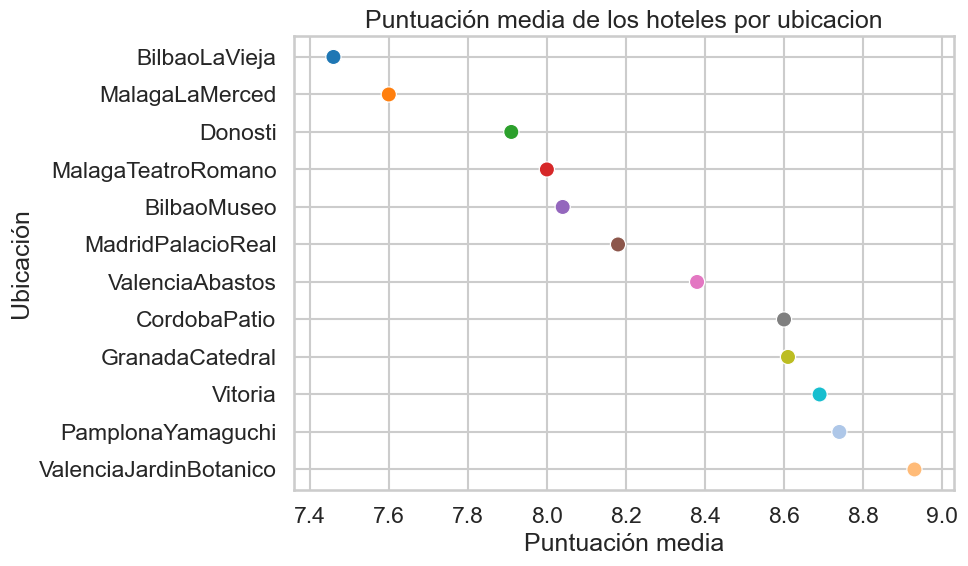

In [48]:
# Asignamos una paleta con al menos 12 colores uno por ubicacion
paleta = [
    "#1F77B4",
    "#FF7F0E",
    "#2CA02C",
    "#D62728",
    "#9467BD",
    "#8C564B",
    "#E377C2",
    "#7F7F7F",
    "#BCBD22",
    "#17BECF",
    "#AEC7E8",
    "#FFBB78"
]

ubicaciones = puntuacion_media_hotel['ubicacion'].unique()
color_por_ubicacion = dict(zip(ubicaciones, paleta))

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=puntuacion_media_hotel,
    x='puntuacion',
    y='ubicacion',
    hue='ubicacion',
    palette=color_por_ubicacion,
    s=120,
    legend=False
)

plt.title("Puntuación media de los hoteles por ubicacion")
plt.xlabel("Puntuación media")
plt.ylabel("Ubicación")

xmin = puntuacion_media_hotel['puntuacion'].min() - 0.1
xmax = puntuacion_media_hotel['puntuacion'].max() + 0.1
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()

#### Grafico 2

In [49]:
# Contar cuantas reseñas tiene cada hotel
resumen_hotel = (df.groupby('ubicacion').agg(puntuacion_media=('puntuacion', 'mean'),num_reseñas=('puntuacion', 'count')).reset_index())


C:\Users\togui\AppData\Local\Temp\ipykernel_3356\3408049124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Ubicación')

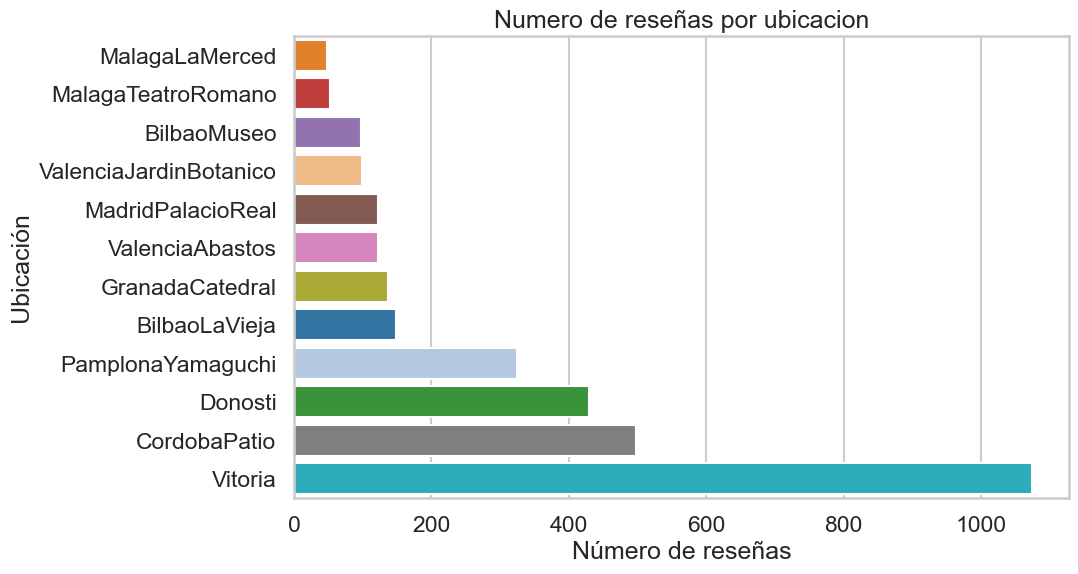

In [50]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

sns.barplot(
    data=resumen_hotel.sort_values('num_reseñas'),
    x='num_reseñas',
    y='ubicacion',
    palette=color_por_ubicacion
)

plt.title("Numero de reseñas por ubicacion")
plt.xlabel("Número de reseñas")
plt.ylabel("Ubicación")


#### Grafico 3

En este grafico se puede ver la relacion entre la puntuacion media de cada hotel y el numero de reseñas que ha recibido. En el eje x se muestra la cantidad de opiniones, lo que nos ayuda a entender hasta que punto la puntuacion es fiable, mientras que en el eje y aparece la puntuacion media.

Este grafico nos permite entender entre los hoteles que tienen una puntuacion alta pero pocas reseñas, donde las valoracion puede no ser del todo representativa, y aquellos que cuentan con muchas reseñas y aun asi presentan una puntuacion mas baja, lo que indica que los problemas detectados son recurrentes.

(0.0, 10.0)

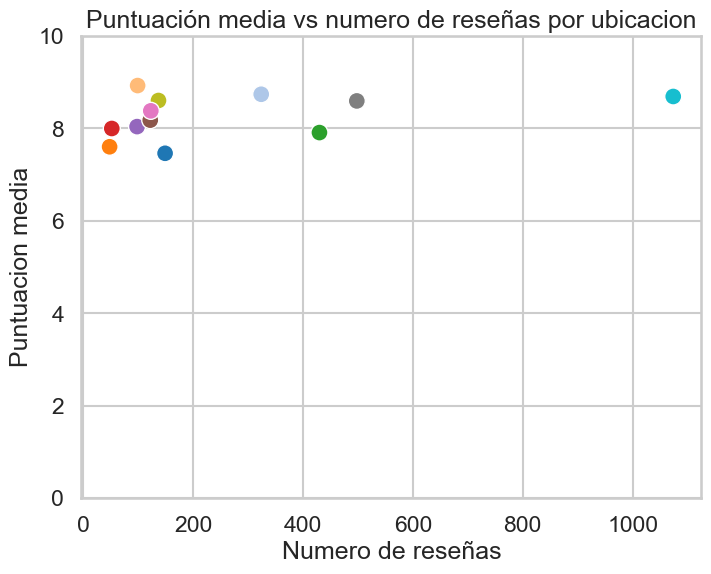

In [51]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=resumen_hotel,
    x='num_reseñas',
    y='puntuacion_media',
    hue='ubicacion',
    palette=color_por_ubicacion,
    s=150,
    legend=False
)

plt.title("Puntuación media vs numero de reseñas por ubicacion")
plt.xlabel("Numero de reseñas")
plt.ylabel("Puntuacion media")
plt.ylim(0, 10)

## Conclusion del analisis exploratorio

Una vez analizados los tres graficos anteriores, podemos llegar a una conclusion bastante clara. El objetivo es seleccionar dos hoteles cuya puntuacion media sea relativamente baja respecto al resto, pero que al mismo tiempo cuenten con un numero de reseñas considerable, ya que una puntuacion alta o baja basada en pocas opiniones no resulta demasiado fiable.

Siguiendo este criterio, se han escogido dos hoteles como casos prioritarios para el analisis:

- **BilbaoLaVieja**: es el hotel con la puntuacion media mas baja de todo el conjunto y ademas cuenta con un numero significativo de reseñas. Esto indica que la valoracion baja no es algo puntual, sino que responde a problemas recurrentes en la experiencia de los huespedes.

- **Donosti**: aunque no es el hotel peor valorado, presenta una puntuacion media mas baja en comparacion con otros hoteles que tienen una cantidad de reseñas similar. Al acumular mas de 400 opiniones, su valoracion puede considerarse muy fiable, lo que lo convierte en un buen candidato para proponer mejoras.

Por tanto, estos dos hoteles son los mas adecuados para profundizar en el analisis de los comentarios y plantear recomendaciones orientadas a mejorar la satisfaccion de los huespedes.


-------------------------------------------------------------------------------------------------------------------

#### Grafico 4

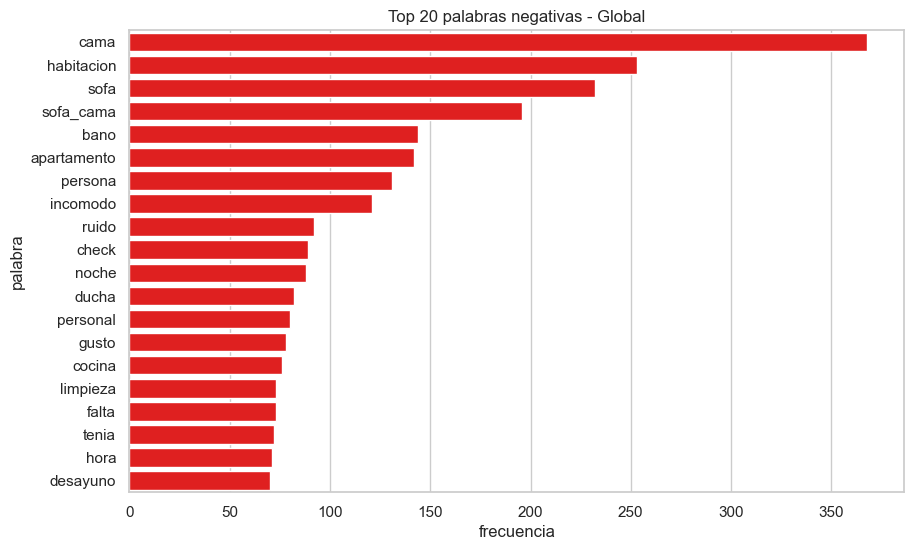

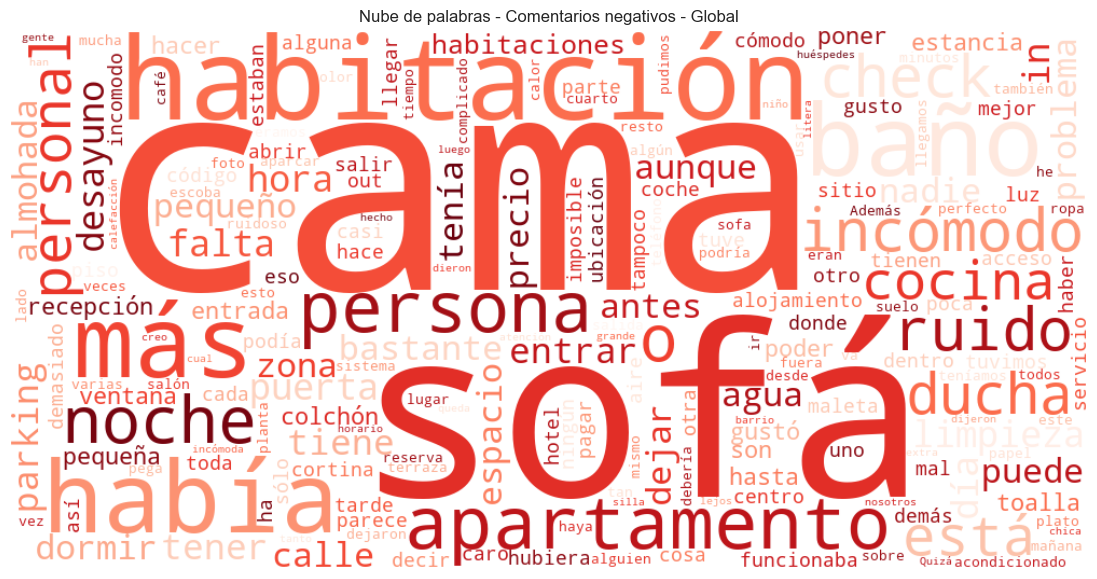

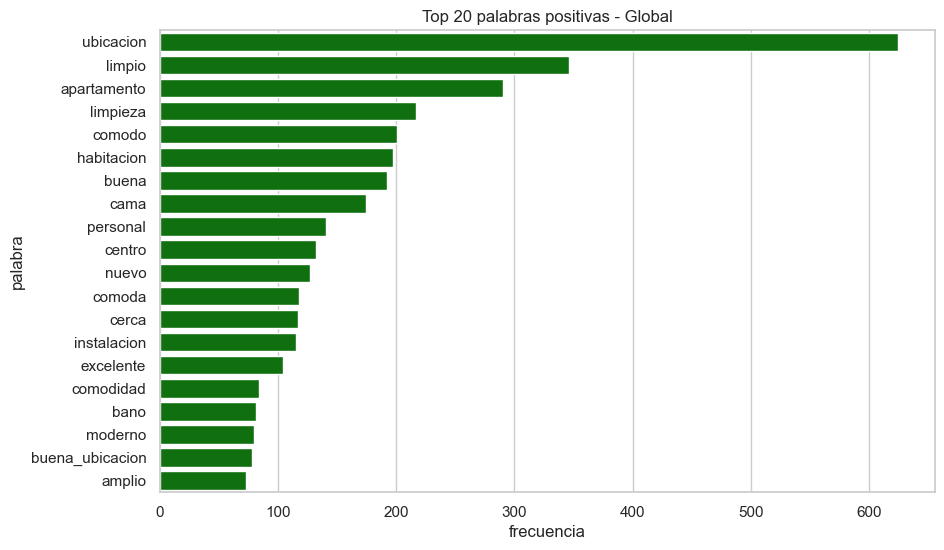

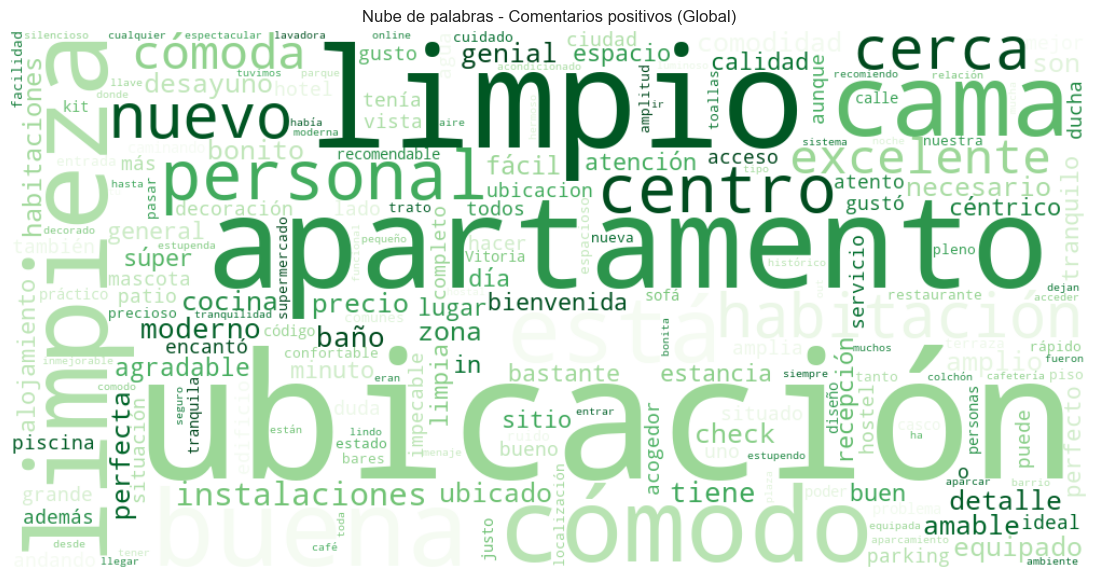

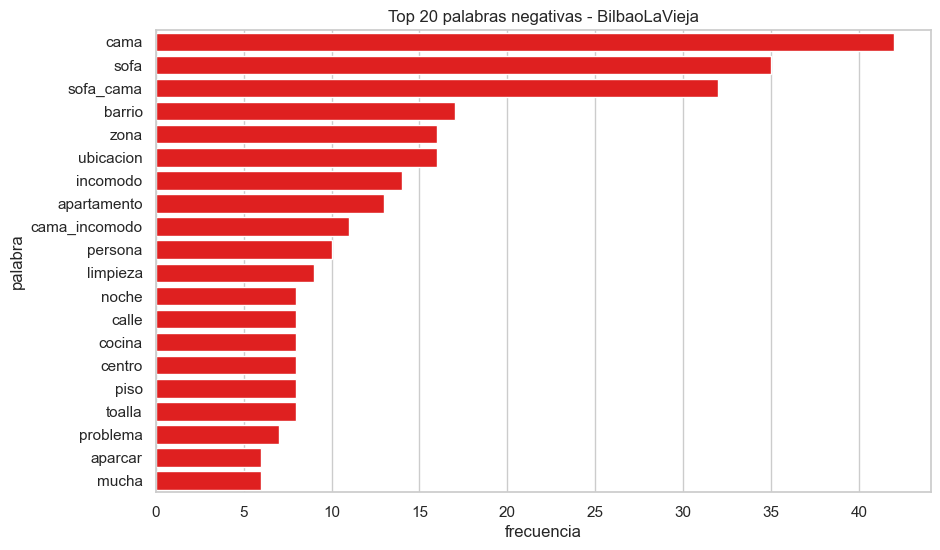

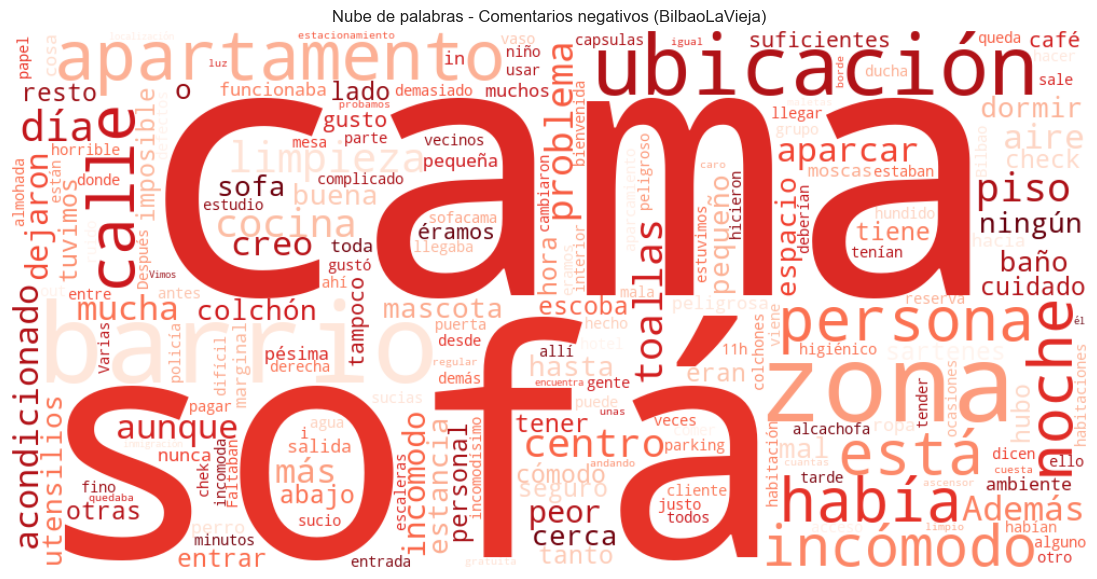

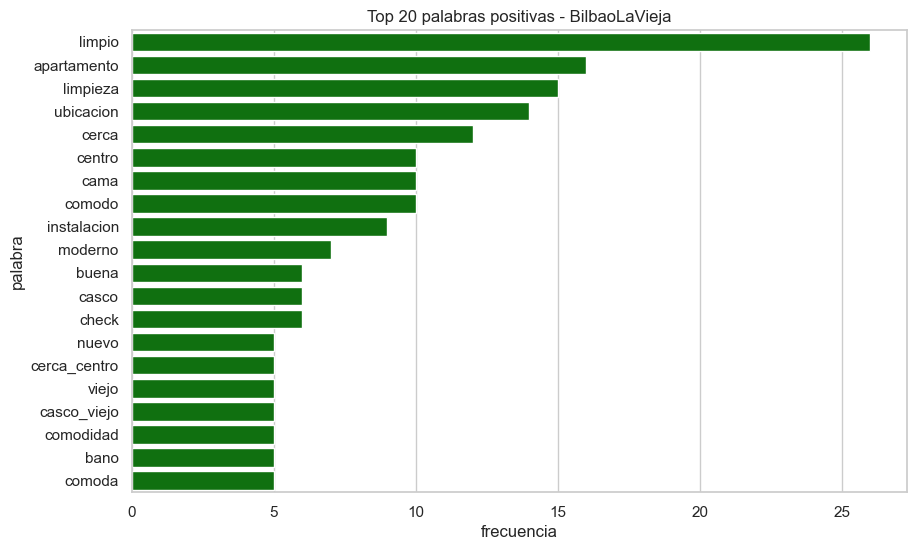

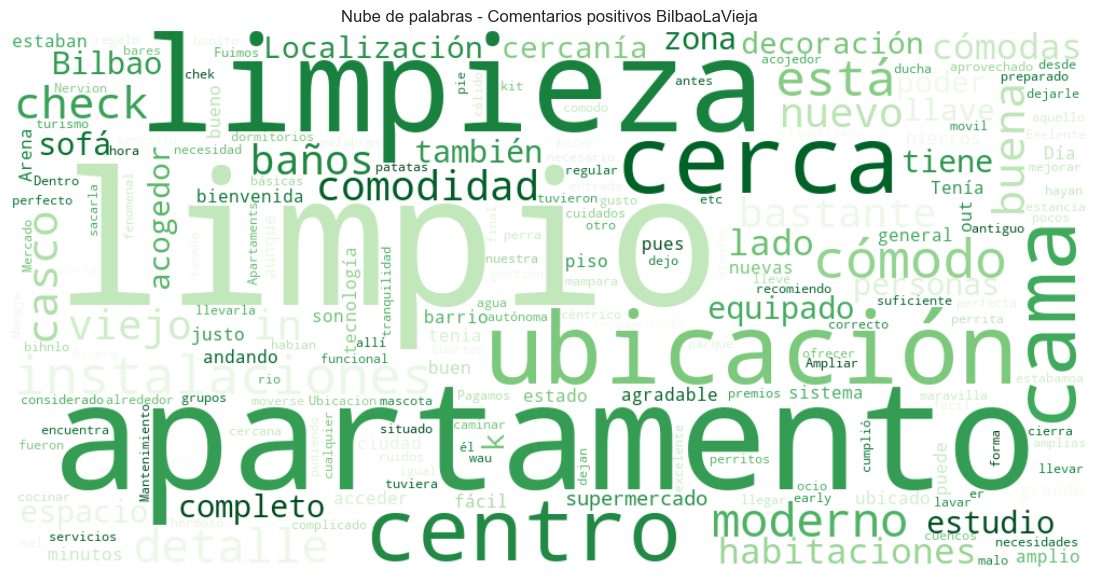

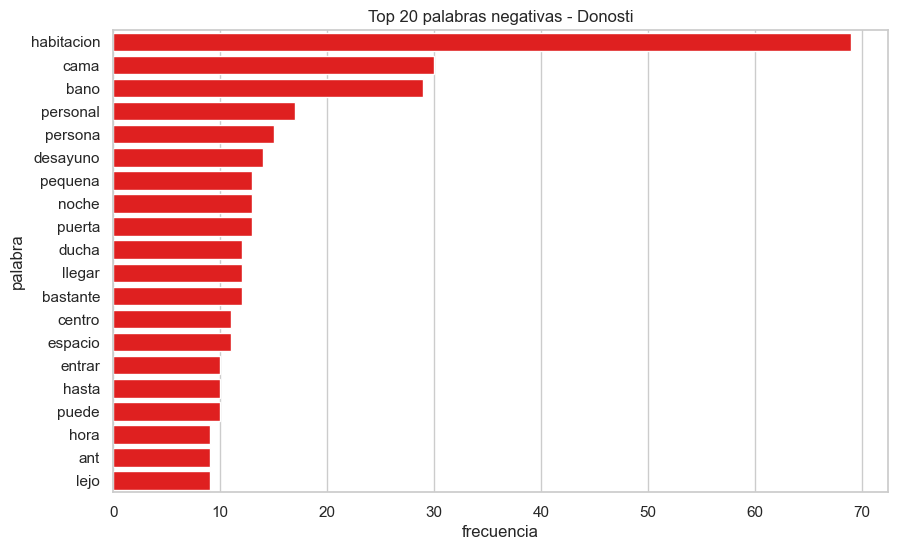

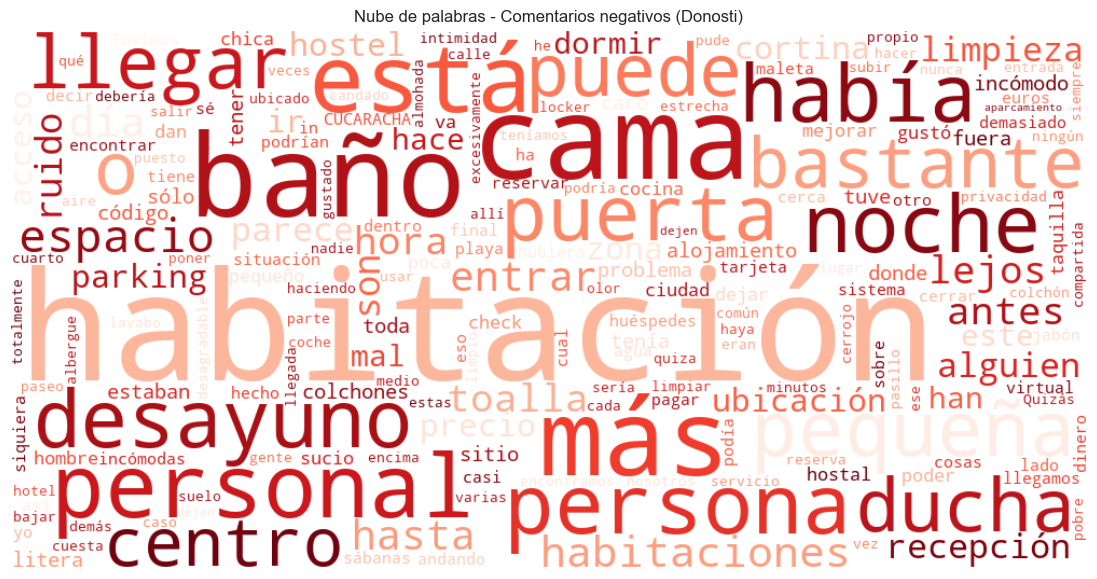

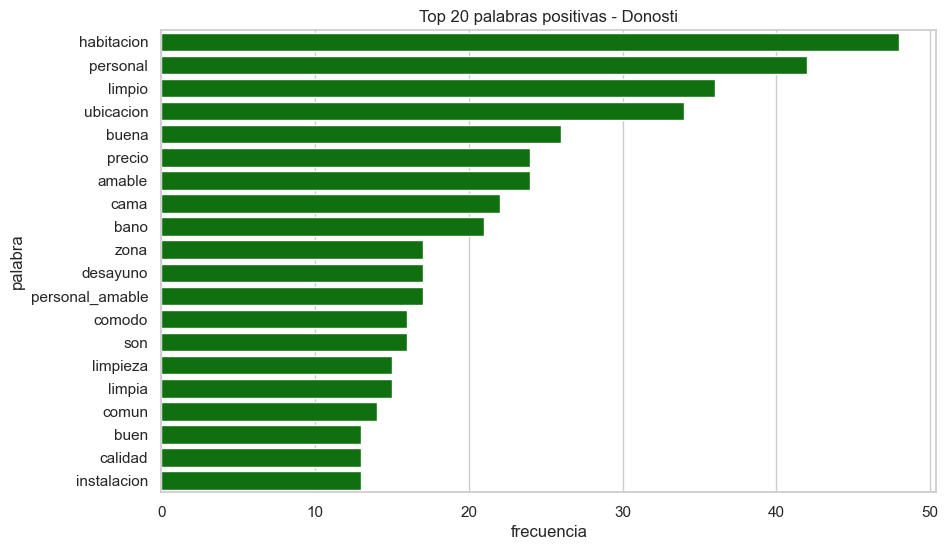

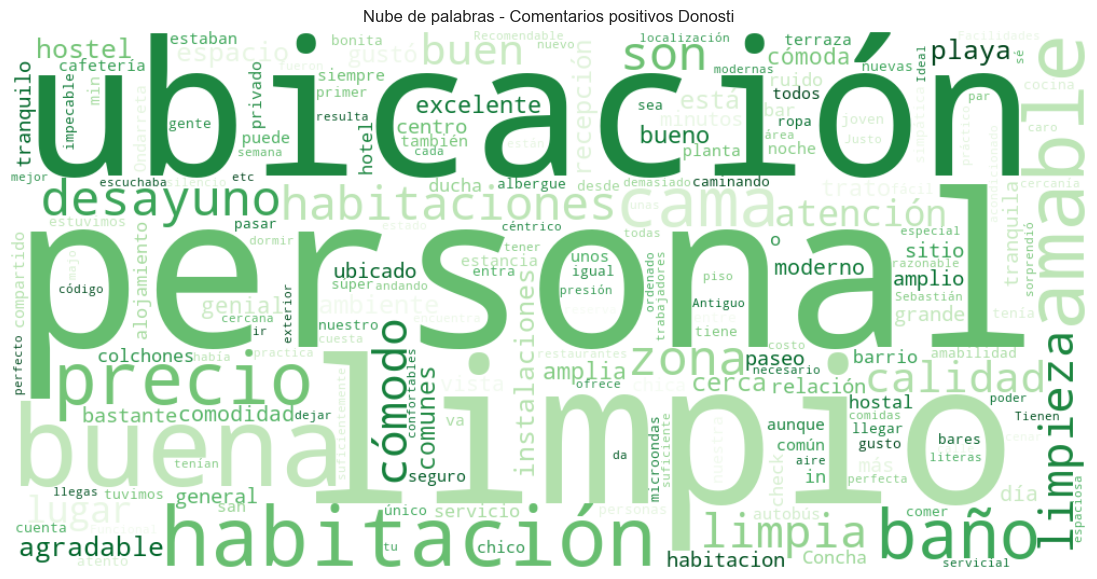

In [52]:
sns.set_theme(style="whitegrid")

df["comentario_negativo"] = df["comentario_negativo"].fillna("")
df["comentario_positivo"] = df["comentario_positivo"].fillna("")

STOPWORDS_ES = {
    "de", "la", "el", "y", "a", "en", "que", "es", "un", "una",
    "por", "para", "con", "no", "se", "los", "las", "muy",
    "todo", "mas", "menos", "pero", "tambien", "ya",
    "al", "del", "lo", "le", "les", "me", "nos", "hay", "q",
    "te", "do", "ni", "era", "si", "porque", "esta", "nada",
    "cuando", "mi", "su", "sus", "como", "asi", "fue", "sin",
    "estaba", "habia", "estan", "estar", "ser", "ademas", "super", 
    "bien", "mucho", "poco", "algo", "solo", "dos"
}

###########################
# Quitar tildes 
###########################
def quitar_tildes(texto):
    texto = unicodedata.normalize("NFD", texto)
    return "".join(c for c in texto if unicodedata.category(c) != "Mn")

###########################
# Normalizar prurales 
###########################
def normalizar_token(token):
    if token.endswith("es"):
        return token[:-2]
    if token.endswith("s") and len(token) > 4:
        return token[:-1]
    return token

###########################
# Limpieza + tokenizar
###########################
def limpiar_y_tokenizar(texto):
    texto = texto.lower()
    texto = quitar_tildes(texto)
    texto = re.sub(r"[^a-zñ\s]", " ", texto)
    tokens = texto.split()
    tokens = [
        normalizar_token(t)
        for t in tokens
        if t not in STOPWORDS_ES and len(t) > 2
    ]
    return tokens


def generar_bigramas(tokens):
    return [f"{tokens[i]}_{tokens[i+1]}" for i in range(len(tokens) - 1)]

###########################
# Conatar palabras 
###########################
def contar_palabras(series_texto):
    tokens = []
    for texto in series_texto:
        t = limpiar_y_tokenizar(texto)
        tokens.extend(t)
        tokens.extend(generar_bigramas(t))
    return Counter(tokens)

###########################
# Wordcloud
###########################
def generar_wordcloud(texto, titulo, colormap):
    wc = WordCloud(
        width=1000,
        height=500,
        background_color="white",
        stopwords=STOPWORDS_ES,
        colormap=colormap,
        collocations=False
    ).generate(texto)

    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(titulo)

###########################
# Analisis Global
###########################

# Negativos Globales 
frec_neg_global = contar_palabras(df["comentario_negativo"])
df_neg_global = pd.DataFrame(
    frec_neg_global.most_common(20),
    columns=["palabra", "frecuencia"]
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_neg_global,
    x="frecuencia",
    y="palabra",
    color="red"
)
plt.title("Top 20 palabras negativas - Global")


generar_wordcloud(
    " ".join(df["comentario_negativo"]),
    "Nube de palabras - Comentarios negativos - Global",
    "Reds"
)

# Positivos Globales
frec_pos_global = contar_palabras(df["comentario_positivo"])
df_pos_global = pd.DataFrame(
    frec_pos_global.most_common(20),
    columns=["palabra", "frecuencia"]
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_pos_global,
    x="frecuencia",
    y="palabra",
    color="green"
)
plt.title("Top 20 palabras positivas - Global")



generar_wordcloud(
    " ".join(df["comentario_positivo"]),
    "Nube de palabras - Comentarios positivos (Global)",
    "Greens"
)

###########################
# Anlasis Hotel
###########################
hoteles_objetivo = ["BilbaoLaVieja", "Donosti"]
df_hoteles = df[df["ubicacion"].isin(hoteles_objetivo)]

for hotel in hoteles_objetivo:

    # Negativos
    frec_neg = contar_palabras(
        df_hoteles[df_hoteles["ubicacion"] == hotel]["comentario_negativo"]
    )
    df_neg = pd.DataFrame(
        frec_neg.most_common(20),
        columns=["palabra", "frecuencia"]
    )

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_neg,
        x="frecuencia",
        y="palabra",
        color="red"
    )
    plt.title(f"Top 20 palabras negativas - {hotel}")
 

    generar_wordcloud(
        " ".join(
            df_hoteles[df_hoteles["ubicacion"] == hotel]["comentario_negativo"]
        ),
        f"Nube de palabras - Comentarios negativos ({hotel})",
        "Reds"
    )

    # Positivos
    frec_pos = contar_palabras(
        df_hoteles[df_hoteles["ubicacion"] == hotel]["comentario_positivo"]
    )
    df_pos = pd.DataFrame(
        frec_pos.most_common(20),
        columns=["palabra", "frecuencia"]
    )

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_pos,
        x="frecuencia",
        y="palabra",
        color="green"
    )
    plt.title(f"Top 20 palabras positivas - {hotel}")


    generar_wordcloud(
        " ".join(
            df_hoteles[df_hoteles["ubicacion"] == hotel]["comentario_positivo"]
        ),
        f"Nube de palabras - Comentarios positivos {hotel}",
        "Greens"
    )


#### Grafico 5

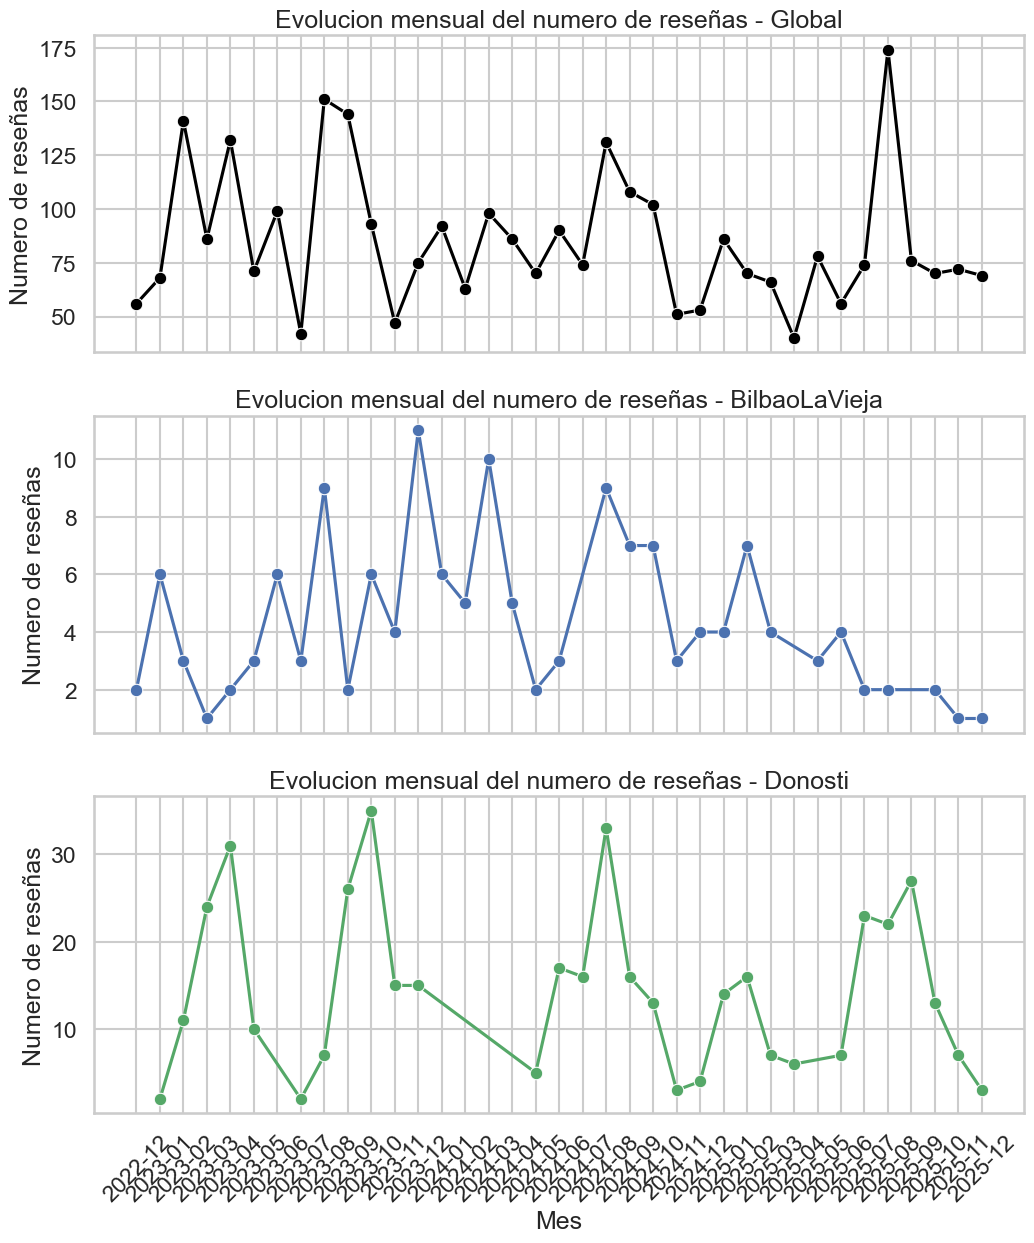

In [53]:
hoteles_objetivo = ["BilbaoLaVieja", "Donosti"]

df["mes"] = df["fecha"].dt.to_period("M").astype(str)

reseñas_global = (
    df.groupby("mes")
    .size()
    .reset_index(name="num_reseñas")
)


reseñas_hoteles = (
    df[df["ubicacion"].isin(hoteles_objetivo)]
    .groupby(["mes", "ubicacion"])
    .size()
    .reset_index(name="num_reseñas")
)


sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

# General
sns.lineplot(
    data=reseñas_global,
    x="mes",
    y="num_reseñas",
    marker="o",
    ax=axes[0],
    color="black"
)
axes[0].set_title("Evolucion mensual del numero de reseñas - Global")
axes[0].set_ylabel("Numero de reseñas")

# Bilbao
sns.lineplot(
    data=reseñas_hoteles[reseñas_hoteles["ubicacion"] == "BilbaoLaVieja"],
    x="mes",
    y="num_reseñas",
    marker="o",
    ax=axes[1],
    color="b"
)
axes[1].set_title("Evolucion mensual del numero de reseñas - BilbaoLaVieja")
axes[1].set_ylabel("Numero de reseñas")

# Donosti
sns.lineplot(
    data=reseñas_hoteles[reseñas_hoteles["ubicacion"] == "Donosti"],
    x="mes",
    y="num_reseñas",
    marker="o",
    ax=axes[2],
    color="g"
)
axes[2].set_title("Evolucion mensual del numero de reseñas - Donosti")
axes[2].set_ylabel("Numero de reseñas")
axes[2].set_xlabel("Mes")

plt.xticks(rotation=45)
plt.show()


#### Grafico 6

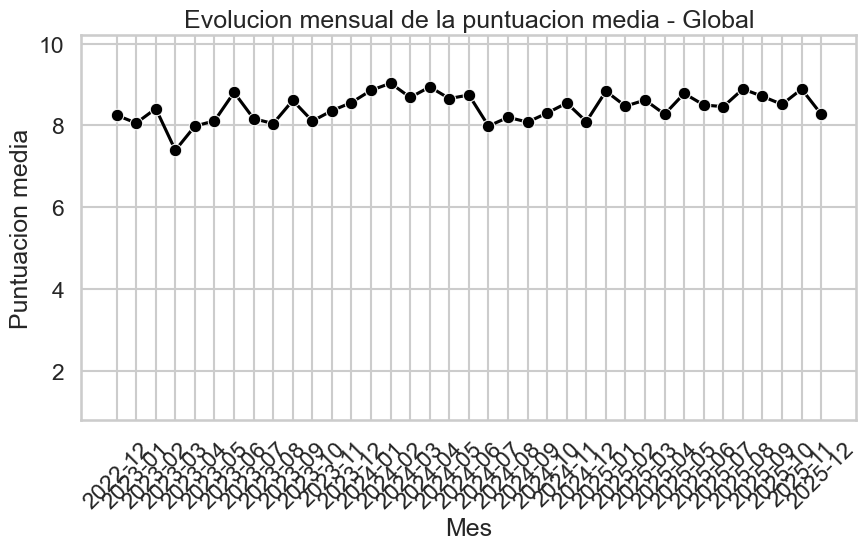

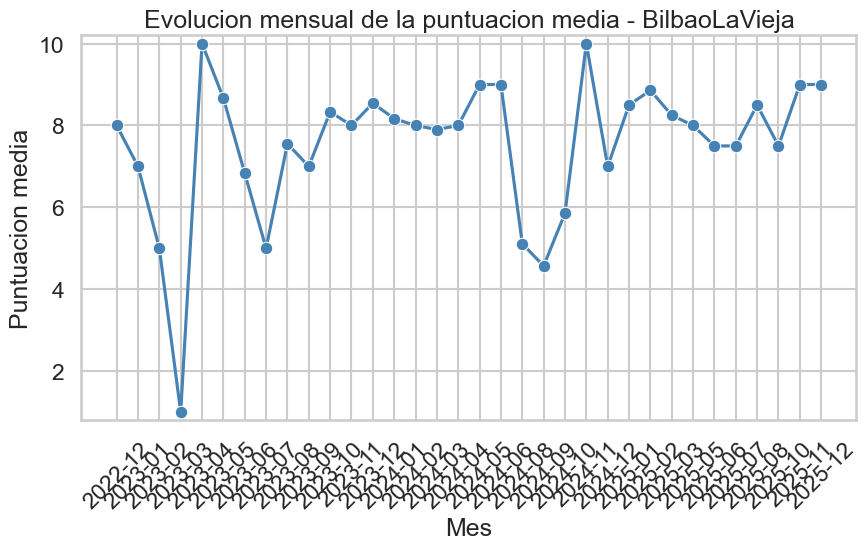

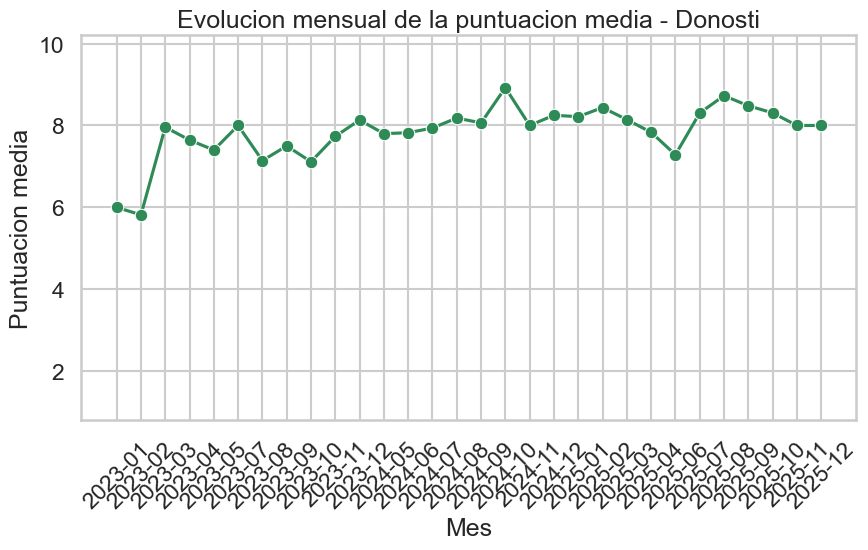

In [54]:
sns.set(style="whitegrid", context="talk")

ymin = df["puntuacion"].min() - 0.2
ymax = df["puntuacion"].max() + 0.2

# Global
media_global = (
    df.groupby("mes")["puntuacion"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=media_global,
    x="mes",
    y="puntuacion",
    marker="o",
    color="black"
)

plt.title("Evolucion mensual de la puntuacion media - Global")
plt.xlabel("Mes")
plt.ylabel("Puntuacion media")
plt.ylim(ymin, ymax)
plt.xticks(rotation=45)
plt.show()


# Bilbao

media_bilbao = (
    df[df["ubicacion"] == "BilbaoLaVieja"]
    .groupby("mes")["puntuacion"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=media_bilbao,
    x="mes",
    y="puntuacion",
    marker="o",
    color="steelblue"
)

plt.title("Evolucion mensual de la puntuacion media - BilbaoLaVieja")
plt.xlabel("Mes")
plt.ylabel("Puntuacion media")
plt.ylim(ymin, ymax)
plt.xticks(rotation=45)
plt.show()

# Donosti
media_donosti = (
    df[df["ubicacion"] == "Donosti"]
    .groupby("mes")["puntuacion"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=media_donosti,
    x="mes",
    y="puntuacion",
    marker="o",
    color="seagreen"
)

plt.title("Evolucion mensual de la puntuacion media - Donosti")
plt.xlabel("Mes")
plt.ylabel("Puntuacion media")
plt.ylim(ymin, ymax)
plt.xticks(rotation=45)
plt.show()



#### Grafico 7

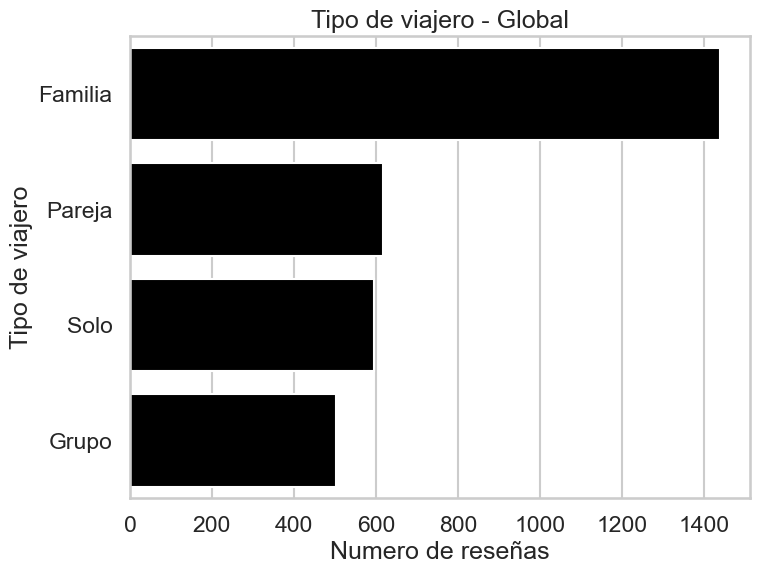

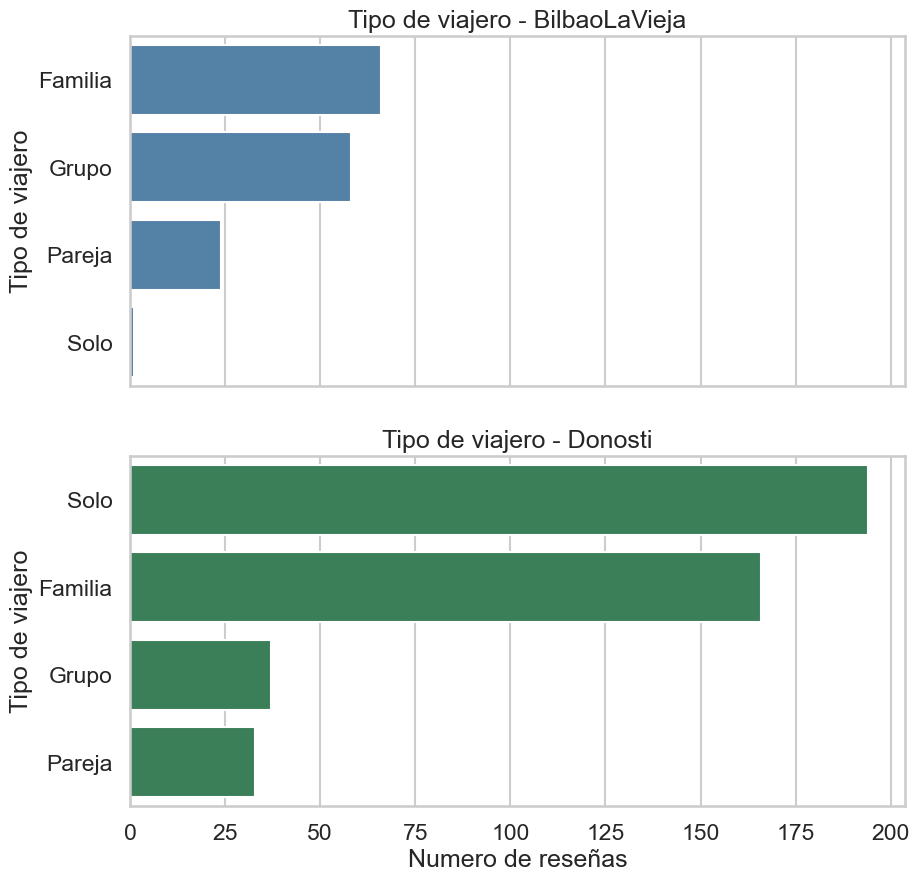

In [55]:
sns.set(style="whitegrid", context="talk")

# Tipo Viajero
def extraer_tipo_viajero(etiquetas):
    etiquetas = str(etiquetas).lower()

    if "persona que viaja sola" in etiquetas:
        return "Solo"
    if "pareja" in etiquetas:
        return "Pareja"
    if "familia" in etiquetas:
        return "Familia"
    if "grupo" in etiquetas:
        return "Grupo"
    if "negocios" in etiquetas:
        return "Negocios"
    return "Otros"

df["tipo_viajero"] = df["etiquetas"].apply(extraer_tipo_viajero)

colores = {
    "General": "black",
    "BilbaoLaVieja": "steelblue",
    "Donosti": "seagreen"
}

conteo_general = (
    df["tipo_viajero"]
    .value_counts()
    .reset_index()
)
conteo_general.columns = ["tipo_viajero", "num_reseñas"]

plt.figure(figsize=(8,6))
sns.barplot(
    data=conteo_general,
    x="num_reseñas",
    y="tipo_viajero",
    color=colores["General"]
)

plt.title("Tipo de viajero - Global")
plt.xlabel("Numero de reseñas")
plt.ylabel("Tipo de viajero")

hoteles_objetivo = ["BilbaoLaVieja", "Donosti"]

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

for i, hotel in enumerate(hoteles_objetivo):

    df_hotel = df[df["ubicacion"] == hotel]

    conteo_viajero = (
        df_hotel["tipo_viajero"]
        .value_counts()
        .reset_index()
    )
    conteo_viajero.columns = ["tipo_viajero", "num_reseñas"]

    sns.barplot(
        data=conteo_viajero,
        x="num_reseñas",
        y="tipo_viajero",
        ax=axes[i],
        color=colores[hotel]
    )

    axes[i].set_title(f"Tipo de viajero - {hotel}")
    axes[i].set_xlabel("Numero de reseñas")
    axes[i].set_ylabel("Tipo de viajero")
